In [1]:
#필요시 설치 목록 
!pip install numpy
!pip install scipy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# 예측된 데이터 호출

In [8]:
df = pd.read_csv('predicted(lasso).csv')

In [9]:
df.head()

,ProbeID,natural.killer.cells,Sex,cumulative.life.stress,treatment.for.anxiety.disorder,personal.life.stress,body.mass.index,treatment.for.posttraumatic.stress.disorder,age,kreek.mchugh.schluger.kellogg.scale.score.for.current.tobacco.use,...,granulocytes,current.stress,kreek.mchugh.schluger.kellogg.scale.score.for.current.cocaine.use,childhood.sexual.physical.abuse.moderate.to.extreme,treatment,cell.line,tissue,treatment.for.bipolar.disorder,treatment.for.depression,DNAmAge_lasso
0,GSM1946540,0.03950,Female,--,--,--,17.78569837,Yes,38,10,...,0.70000,--,0,Yes,,,whole Blood,--,Yes,23.723887
1,GSM1868344,0.09724,Female,10,No,5,20.15979569,No,26,,...,0.40365,4,,Yes,,,whole Blood,No,No,47.961063
2,GSM1868385,0.08086,Male,11,No,8,23.67932809,No,52,,...,0.46533,7,,No,,,whole Blood,No,Yes,36.739640
3,GSM1868177,0.07102,Female,11,Yes,6,41.97368929,No,36,,...,0.58992,6,,Yes,,,whole Blood,No,No,53.026931
4,GSM1868165,0.10973,Female,11,No,8,22.9112426,No,58,7,...,0.46581,5,0,Yes,,,whole Blood,No,,52.494999


# EDA및 전처리

## 분포에 필요한 피처 합산

In [10]:
#컬럼들의 .을 띄어쓰기로 변환
df.columns = df.columns.str.replace('.', ' ')

C:\Users\jyuma\AppData\Local\Temp\ipykernel_7472\4008888818.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', ' ')


In [11]:
df.columns

Index(['ProbeID', 'natural killer cells', 'Sex', 'cumulative life stress',
       'treatment for anxiety disorder', 'personal life stress',
       'body mass index', 'treatment for posttraumatic stress disorder', 'age',
       'kreek mchugh schluger kellogg scale score for current tobacco use',
       'dna methylation predicted age', 'network life stress', 'monocytes',
       'posttraumatic stress disorder symptom scale total score', 'b cells',
       'kreek mchugh schluger kellogg scale score for current alcohol use',
       'childhood trauma questionnaire total score', 'cd4 t cells',
       'beck depression inventory total score',
       'kreek mchugh schluger kellogg scale score for current marijuana use',
       'kreek mchugh schluger kellogg scale score for current heroin use',
       'cd8 t cells', 'race ethnicity', 'granulocytes', 'current stress',
       'kreek mchugh schluger kellogg scale score for current cocaine use',
       'childhood sexual physical abuse moderate to extr

In [12]:
new_df = df[['ProbeID','age','DNAmAge_lasso','Sex','cumulative life stress',
       'treatment for anxiety disorder', 'personal life stress','network life stress',
       'body mass index', 'treatment for posttraumatic stress disorder',
             'beck depression inventory total score','current stress',
             'childhood sexual physical abuse moderate to extreme',
             'treatment for bipolar disorder','treatment for depression']]
             

In [13]:
new_df

,ProbeID,age,DNAmAge_lasso,Sex,cumulative life stress,treatment for anxiety disorder,personal life stress,network life stress,body mass index,treatment for posttraumatic stress disorder,beck depression inventory total score,current stress,childhood sexual physical abuse moderate to extreme,treatment for bipolar disorder,treatment for depression
0,GSM1946540,38,23.723887,Female,--,--,--,--,17.78569837,Yes,31,--,Yes,--,Yes
1,GSM1868344,26,47.961063,Female,10,No,5,5,20.15979569,No,11,4,Yes,No,No
2,GSM1868385,52,36.739640,Male,11,No,8,3,23.67932809,No,5,7,No,No,Yes
3,GSM1868177,36,53.026931,Female,11,Yes,6,5,41.97368929,No,11,6,Yes,No,No
4,GSM1868165,58,52.494999,Female,11,No,8,3,22.9112426,No,30,5,Yes,No,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,GSM1868038,44,32.002359,Male,,No,,5,,No,3,,No,No,No
386,GSM1868227,22,28.106936,Female,12,No,9,3,21.50594724,No,17,7,Yes,No,No
387,GSM1868388,23,48.685240,Female,7,No,5,2,47.2031109,No,33,6,Yes,No,No
388,GSM1868263,53,49.380548,Male,12,No,9,3,36.28587657,No,26,4,No,No,No


## Age 관련

### 실제연령

####  형변환 및 분포확인

In [14]:
# 숫자형으로 age 변환.
new_df['age'] = pd.to_numeric(new_df['age'])


C:\Users\jyuma\AppData\Local\Temp\ipykernel_7472\2160183582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age'] = pd.to_numeric(new_df['age'])


#### 결측값 확인 

In [15]:
new_df['age'].isna().sum()

0

### DNAmAge

#### 형변환 및 분포확인

C:\Users\jyuma\AppData\Local\Temp\ipykernel_7472\707818486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DNAmAge_lasso'] = pd.to_numeric(new_df['DNAmAge_lasso'])


<Axes: ylabel='Frequency'>

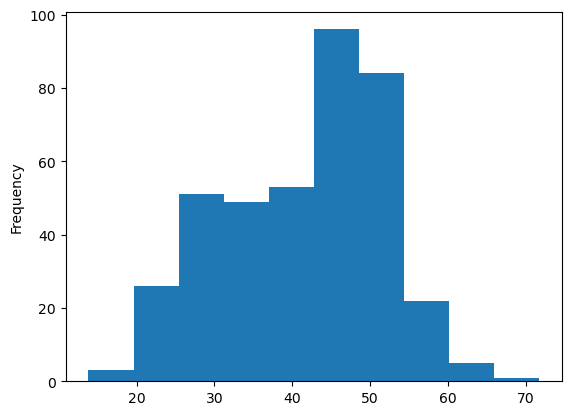

In [16]:
new_df['DNAmAge_lasso'] = pd.to_numeric(new_df['DNAmAge_lasso'])



new_df['DNAmAge_lasso'].plot(kind='hist')

### 실제 연령 - DNA 메틸화 연령 컬럼 생성 

age_diff를 정의한다. age_diff 는 실제 연령에서 DNA 메틸화 연령을 뺸 값을 의미하며 본 분석에서 age_diff라고 통칭한다.

In [17]:
#age_diff 컬럼 정의 
new_df['age_diff'] = new_df['age'] - new_df['DNAmAge_lasso']

C:\Users\jyuma\AppData\Local\Temp\ipykernel_7472\2344112862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age_diff'] = new_df['age'] - new_df['DNAmAge_lasso']


In [18]:
#분석의 편의를 위해 순서 재정의 
new_df = new_df[['ProbeID','age','DNAmAge_lasso','age_diff','Sex','cumulative life stress',
       'treatment for anxiety disorder', 'personal life stress','network life stress',
       'body mass index', 'treatment for posttraumatic stress disorder',
             'beck depression inventory total score','current stress',
             'childhood sexual physical abuse moderate to extreme',
             'treatment for bipolar disorder','treatment for depression']]
             

In [19]:
new_df.columns

Index(['ProbeID', 'age', 'DNAmAge_lasso', 'age_diff', 'Sex',
       'cumulative life stress', 'treatment for anxiety disorder',
       'personal life stress', 'network life stress', 'body mass index',
       'treatment for posttraumatic stress disorder',
       'beck depression inventory total score', 'current stress',
       'childhood sexual physical abuse moderate to extreme',
       'treatment for bipolar disorder', 'treatment for depression'],
      dtype='object')

<Axes: xlabel='age_diff', ylabel='Count'>

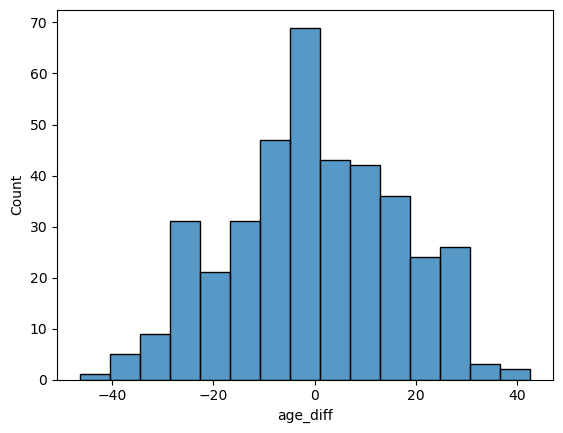

In [20]:
#히스토그램으로 대략적 분포 확인
sns.histplot(new_df['age_diff'])

<Axes: >

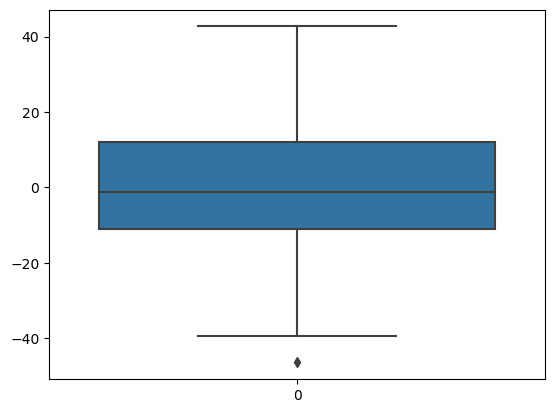

In [21]:
#boxplt
sns.boxplot(new_df['age_diff'])


In [22]:
#이상치 값들을 확인하기 위해 함수정의
import numpy as np
from collections import Counter

def detect_outliers(new_df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(new_df[col], 25)
        Q3 = np.percentile(new_df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = new_df[(new_df[col] < Q1 - outlier_step) | (new_df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers


Outliers_to_drop = detect_outliers(new_df, 0, ['age_diff'])

In [23]:
#이상치 행 출력 
new_df.loc[Outliers_to_drop]

,ProbeID,age,DNAmAge_lasso,age_diff,Sex,cumulative life stress,treatment for anxiety disorder,personal life stress,network life stress,body mass index,treatment for posttraumatic stress disorder,beck depression inventory total score,current stress,childhood sexual physical abuse moderate to extreme,treatment for bipolar disorder,treatment for depression
230,GSM1868259,19,65.474464,-46.474464,Female,8,No,6,2,26.38205464,No,8,2,No,No,No


분석 결과에 따르면, IQR(Interquartile Range) 기준으로 판단했을 때 확인되는 이상치는 없음 

## BDI

벡 우울척도(BDI·Beck Depression Inventory)는 어린이와 성인의 우울 정도를 측정하는 데 사용되는 21개의 객관식 질문으로 구성된 자가보고 설문지이다. 이 결과를 통해 우울 척도가 어느정도 되는지 판단할 수 있다.



### 결측값 작업 및 형변환 

In [24]:
#결측값 확인 
new_df['beck depression inventory total score'].unique()

array(['31', '11', '5', '30', '4', '6', '22', '15', '37', '3', '18', '40',
       '50', '29', ' ', '17', '19', '35', '7', '21', '14', '1', '8', '0',
       '2', '9', '--', '23', '55', '44', '10', '33', '13', '20', '25',
       '24', '28', '43', '32', '42', '16', '27', '26', '12', '39', '38',
       '34', '47', '41', '45', '36', '56', '58', '46'], dtype=object)

In [25]:
#미입력 데이터를 결측값으로 표기 
new_df['beck depression inventory total score'].replace([' ', '--'], float('NaN'), inplace=True)

C:\Users\jyuma\AppData\Local\Temp\ipykernel_7472\3939857866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['beck depression inventory total score'].replace([' ', '--'], float('NaN'), inplace=True)


In [26]:
#결측값 제거 
filtered_BDI_df = new_df.dropna(subset=['beck depression inventory total score'])

In [27]:
#숫자형으로 변환 
filtered_BDI_df['beck depression inventory total score'] = pd.to_numeric(filtered_BDI_df['beck depression inventory total score'])

C:\Users\jyuma\AppData\Local\Temp\ipykernel_7472\2514767745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_BDI_df['beck depression inventory total score'] = pd.to_numeric(filtered_BDI_df['beck depression inventory total score'])


### 집단 분할 

http://www.youthclinic.org/sub6_3.php


서울대학교병원 청년클리닉 점수에 따르면 16점 이상으로는 중증도 우울과 더 나아가면 심한 우울에 해당한다. 따라서 집단을 BDI 점수가 16점 미만과 16점 이상으로 분할하였다.

In [28]:
BDI_below_16 = filtered_BDI_df[filtered_BDI_df['beck depression inventory total score'] < 16]
BDI_above_or_equal_16 = filtered_BDI_df[filtered_BDI_df['beck depression inventory total score'] >= 20]


### 분할된 집단에 따른 age_diff 시각화

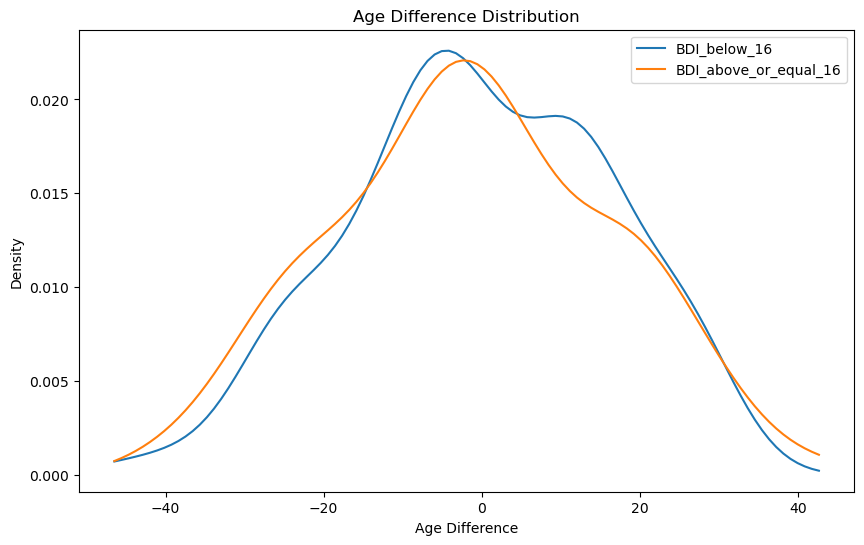

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 6))

#kde함수를 통해 데이터셋정의 
density_BDI_below_16 = gaussian_kde(BDI_below_16['age_diff'])
density_BDI_above_or_equal_16 = gaussian_kde(BDI_above_or_equal_16['age_diff'])

# 데이터셋 범위 지정(최소에서 최대)
x = np.linspace(min(BDI_below_16['age_diff'].min(), BDI_above_or_equal_16['age_diff'].min()), 
                max(BDI_below_16['age_diff'].max(), BDI_above_or_equal_16['age_diff'].max()), 100)

# 시각화 수행 
plt.plot(x, density_BDI_below_16(x), label='BDI_below_16')
plt.plot(x, density_BDI_above_or_equal_16(x), label='BDI_above_or_equal_16')

plt.legend(loc='upper right')
plt.title('Age Difference Distribution')
plt.xlabel('Age Difference')
plt.ylabel('Density')

plt.show()


두 그래프는 육안상으로는 어느정도 정규분포를 띄고 있다. 

# 검정 ( 두 집단의 age_diff가 차이가 있는가? )

## 두 집단의 평균이 차이가 있는가?

### Shpiro-wilk Test

앞선 시각화에서 데이터가 정규분포를 가정하는지 검정하기 전에 시각화를 해보았다. 이번엔 Shapiro-Wilk Test를 통해 p-value값을 확인해 본다. 

Shapiro-Wilk 테스트는 데이터가 정규 분포를 따르는지 아닌지를 검증하는 통계적 방법이다.이 테스트의 귀무 가설은 "주어진 데이터 샘플이 정규 분포를 따르는가"이고, 대립 가설은 "주어진 데이터 샘플이 정규 분포를 따르지 않는가"이다.

테스트 결과로 도출된 p-value 값에 따라 데이터의 분포를 확인하는데, p-value가 0.05보다 크면 데이터가 정규 분포를 따르는 것으로 해석된다. 반면, p-value가 0.05보다 작으면 데이터가 정규 분포를 따르지 않는 것으로 간주된다.

In [30]:
from scipy import stats

# BDI_below_16 data
statistic, p_value = stats.shapiro(BDI_below_16['age_diff'])
print(f"BDI_below_16: statistic={statistic}, p-value={p_value}")

# BDI_above_or_equal_16 data
statistic, p_value = stats.shapiro(BDI_above_or_equal_16['age_diff'])
print(f"BDI_above_or_equal_16: statistic={statistic}, p-value={p_value}")


BDI_below_16: statistic=0.9855731725692749, p-value=0.04557966813445091
BDI_above_or_equal_16: statistic=0.9890974164009094, p-value=0.4447697699069977


두 데이터셋 모두 p-value가  0.05보다 크므로 데이터가 정규분포를 따른다는 귀무가설을 기각하지 못한다. 따라서 두 집단 모두 'age_diff'에 있어선 정규분포를 따른다.

### Levene's test  

데이터가 정규 분포를 따르므로 독립 표본 t-검정(independent two-sample t-test)을 사용하여 두 집단 간의 차이를 검증할 수 있다. 하지만 이 검정은 두 집단의 분산이 같다는 등분산성 가정을 필요로 하므로, 검증 작업에 들어가기 전에 등분산성을 확인한다.

Levene의 검정은 두 개 이상의 그룹 간 분산의 동질성, 즉 등분산성을 검정하는 통계적 방법이다. 

Levene의 검정에서 귀무 가설(H0)은 "모든 그룹의 분산이 동일하다"는 것이다. 반면, 대립 가설(H1)은 "적어도 한 그룹의 분산이 다른 그룹과 다르다"는 것이다.

Levene의 검정은 p-value 값을 반환한다. 일반적으로 p-value가 0.05보다 크면 귀무 가설을 기각하지 않는다. 즉, 모든 그룹이 등분산성을 만족한다고 판단할 수 있다.

하지만 p-value가 0.05보다 작으면 귀무 가설을 기각하고, 대립 가설을 수용한다. 이 경우, 적어도 한 그룹이 다른 그룹과 분산이 다르며 등분산성을 만족하지 않는 것으로 판단된다.

In [31]:
from scipy import stats

# Levene's test for equal variances
statistic, p_value = stats.levene(BDI_below_16['age_diff'], BDI_above_or_equal_16['age_diff'])

print(f"statistic={statistic}, p-value={p_value}")


statistic=0.25980344521309895, p-value=0.6106144159946927


p-value 가 0.05 보다 크다. 따라서 두 집단이 등분산성을 가진다는 것을 확인할 수 있다. 

### Independent two-sample t-test

정규분포를 따르는지 확인했고 등분산성을 가진다는 것을 확인했으므로  Independent two-sample t-test을 수행함으로써 두 집단이 과연 평균이 차이가 있는지 확인한다. 

독립 표본 t-검정(Independent two-sample t-test)은 두 독립적인 그룹 간의 평균 차이가 통계적으로 유의미한지를 검정하는 방법이다. 이 방법은 주로 두 집단의 평균을 비교할 때 사용된다.

독립 표본 t-검정에서 귀무 가설(H0)은 "두 그룹의 모평균이 동일하다"는 것이다. 반면, 대립 가설(H1)은 "두 그룹의 모평균이 다르다"는 것이다.

독립 표본 t-검정은 p-value 값을 반환한다. 일반적으로 p-value가 0.05보다 크면 귀무 가설을 기각하지 않는다. 즉, 두 그룹의 평균에 차이가 없다고 판단할 수 있다.

하지만 p-value가 0.05보다 작으면 귀무 가설을 기각하고, 대립 가설을 수용한다. 이 경우, 두 그룹 간에 평균 차이가 통계적으로 유의미하게 다르다고 판단된다.

In [32]:
from scipy import stats

# Independent two-sample t-test
statistic, p_value = stats.ttest_ind(BDI_below_16['age_diff'], BDI_above_or_equal_16['age_diff'])

print(f"statistic={statistic}, p-value={p_value}")


statistic=0.5121879651137919, p-value=0.6088806727515061


p-value가 0.05보다 크므로, 귀무 가설을 기각하지 않는다. 즉, 두 그룹 간에 통계적으로 유의미한 평균 차이가 없음을 의미한다. 다시 말해, 이 검정 결과에 따르면 두 그룹의 평균은 동일하다고 볼 수 있다.

## 상관관계가 있는가? 

### Pearson Correlation Coefficient 

피어슨 상관 계수는 코시-슈바르츠 부등식에 의해 +1과 -1 사이의 값을 가지며, +1은 완벽한 양의 선형 상관 관계, 0은 선형 상관 관계 없음, -1은 완벽한 음의 선형 상관 관계를 의미한다.

In [33]:

# Assuming that data is a DataFrame and BDI and age_diff are columns in it
correlation = filtered_BDI_df['beck depression inventory total score'].corr(filtered_BDI_df['age_diff'])

print(f"Correlation between BDI and age_diff is {correlation}")


Correlation between BDI and age_diff is -0.0197715987048192


상관 계수는 -0.024로, BDI와 age_diff 사이에는 약한 음의 상관 관계가 있다고 볼 수 있다.

하지만 이 값은 매우 작으므로, 실질적으로 BDI와 age_diff 사이에는 거의 연관성이 없다고 해석할 수 있다. 즉, BDI 점수의 변화가 age_diff의 변화를 크게 설명하지 못한다.

따라서 이 결과를 바탕으로 볼 때, BDI가 age_diff에 유의미한 영향을 미치지 않는다고 할 수 있다. 하지만 이러한 결론은 현재 사용된 데이터와 분석 방법에 국한된 것이며, 다른 변수들을 고려하거나 다른 분석 방법을 사용하면 다른 결과를 얻을 수 있음을 유념해야 한다.